In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

df = pd.read_csv('data.csv')
print(df.columns)
Y = df['MEDV']
X = df[['RM', 'AGE']]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


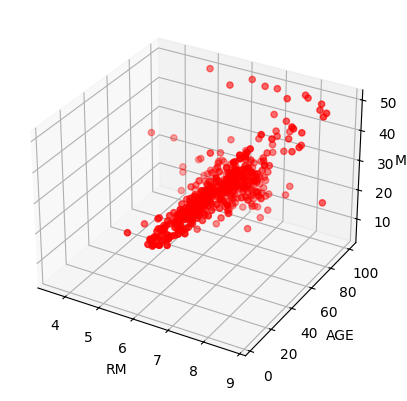

In [2]:
#print(X.head())
#print(y.head())
#plot 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['RM'], X['AGE'], Y, c='r', marker='o')
ax.set_xlabel('RM')
ax.set_ylabel('AGE')
ax.set_zlabel('MEDV')
plt.show()

In [3]:
########################################################################################

def mean_absolute_percentage_error(y_pred, y_true):
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert len(y_true) == len(y_pred)
    
    if np.any(y_true==0):
        print("Found zeroes in y_true. MAPE undefined. Removing from set...")
        idx = np.where(y_true==0)
        y_true = np.delete(y_true, idx)
        y_pred = np.delete(y_pred, idx)
        
    return(np.mean(np.abs((y_true - y_pred) / y_true)) * 100)

########################################################################################

def mean_average_error(y_pred, y_true):
       
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert len(y_true) == len(y_pred) 
    
    return np.mean(np.abs(y_pred - y_true))
    
########################################################################################

def mean_absolute_error(y_pred, y_true):
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert len(y_true) == len(y_pred)
    
    return np.mean(np.abs(y_true - y_pred))

########################################################################################

def residual_sum_square(y_pred, y_true):
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert len(y_true) == len(y_pred)
    
    return np.sum((y_true - y_pred)**2)

########################################################################################

loss_function = residual_sum_square

  -2.52774e+01   -2.52774e+01
   8.40158e+00    8.40158e+00
  -7.27768e-02   -7.27768e-02
        Optimized final loss function: 20064.89134
Linear Regression FINAL loss function: 20064.89134


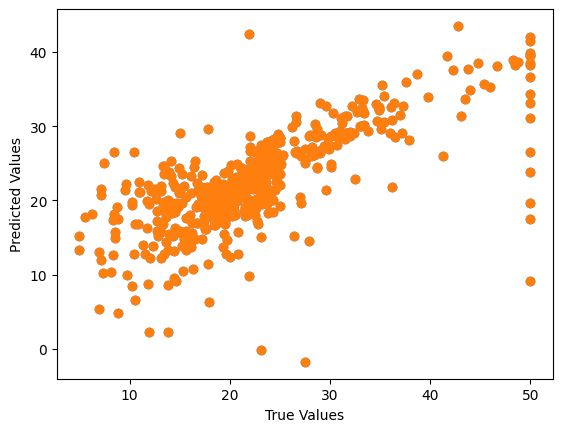

In [4]:
from sklearn.linear_model import LinearRegression

########################################################################################

def objective_function(beta, X, Y):
    error = loss_function(np.matmul(X,beta), Y)
    return(error)

########################################################################################

lm = LinearRegression()
lm.fit(X, Y)

# Add an intercept column to the model.
Xn = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)

beta_init = np.array([1]*Xn.shape[1])
result = minimize(objective_function, beta_init, args=(Xn,Y),
                  method='BFGS', options={'maxiter': 1000})
beta_hat = result.x

for i, b in enumerate(beta_hat):
    if i == 0:
        print("%14.5e %14.5e"%(b, lm.intercept_))
    else:
        print("%14.5e %14.5e"%(b, lm.coef_[i-1]))

#print(result)
optlf = loss_function(np.matmul(Xn,beta_hat), Y)
lrlf = loss_function(lm.predict(X), Y)

print("        Optimized final loss function: %10.5f"%(optlf))
print("Linear Regression FINAL loss function: %10.5f"%(lrlf))

# scatter plot
plt.scatter(Y, np.matmul(Xn,beta_hat))
plt.scatter(Y, lm.predict(X))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()
